## Bank Churners

Dataset Background

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

### About this file

Author Notes:　PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING

A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

In [1]:
# Start the project study -
# Study the relationship of the customer attributes and the churners 

In [2]:
# Import libraries and plot style
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
# Import raw data
df = pd.read_csv('./BankChurners.csv')

# drop the no-use columns as the data described
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)


In [4]:
# examinate the data
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


Identify the type of variable in this datasets 

1.	CLIENTNUM	 - Client number. Unique identifier for the customer holding the account
2.	Attrition_Flag	 - Internal event (customer activity) variable - Existing Customer / Attrited Customer
3.	Customer_Age	 - Demographic variable - Customer's Age in Years
4.	Gender	 - Demographic variable - M=Male, F=Female
5.	Dependent_count	 - Demographic variable - Number of dependents
6.	Education_Level	 - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
7.	Marital_Status	 - Demographic variable - Married, Single, Divorced, Unknown
8.	Income_Category	 - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >$120K+)
9.	Card_Category	 - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
10.	Months_on_book	 - Period of relationship with bank
11.	Total_Relationship_Count	 - Total no. of products held by the customer
12.	Months_Inactive_12_mon	 - No. of months inactive in the last 12 months
13.	Contacts_Count_12_mon	 - No. of Contacts in the last 12 months
14.	Credit_Limit	 - Credit Limit on the Credit Card
15.	Total_Revolving_Bal	 - Total Revolving Balance on the Credit Card
16.	Avg_Open_To_Buy	 - Open to Buy Credit Line (Average of last 12 months)
17.	Total_Amt_Chng_Q4_Q1	 - Change in Transaction Amount (Q4 over Q1)
18.	Total_Trans_Amt	 - Total Transaction Amount (Last 12 months)
19.	Total_Trans_Ct	 - Total Transaction Count (Last 12 months)
20.	Total_Ct_Chng_Q4_Q1	 - Change in Transaction Count (Q4 over Q1)
21.	Avg_Utilization_Ratio	 - Average Card Utilization Ratio

In [5]:
# Show the shape
df.shape

(10127, 21)

In [6]:
# See if any null value
df.isnull().any()  

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

From the above, we can see there is no empty value in the dataset  
However, there are some variable contains 'Unknown' in the value when we check the data  
Therefore, it is necessary to check which variable contains value 'Unknown'

In [7]:
# Understand the attributes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

 The above table summarized the datatypes of each variable. 

 It helps to find out the 'Unknown' data, as 'Unknown' is a string, only the 'object' datatype can contain a string. 

In short, we can observe there are 6 object datatypes which may possible have empty values. 

In [8]:
# Select the categorical fields and check the possible values and its percengtage
column_info=pd.DataFrame(df.dtypes)
# filter out the types which is categorical
categorical_variable= column_info.index[column_info[0] == 'object']
categorical_variable

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [9]:
# Display the possible value of the categorical variable
for i in categorical_variable:
    displaydf=df[i].value_counts(normalize=True)
    print(displaydf)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64
F    0.529081
M    0.470919
Name: Gender, dtype: float64
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64


From the above , we can see there is value 'Unknown' in 3 variable:   
**Education_Level , Marital_Status and Income_Category**

Since **Education_Level** and **Income_Category** is ordinal variable (not nominal) and the Unknown value is < 15%, we will consider to convert it into ordinal format such as 1,2,3,4,5 to indicate the levels, and set NaN for unknowns 

Also for the Card Level (but no need to assign nan there )

In [10]:
# Add Oridinal numeric Variable for Education and Income category
Education_dict = { 'Uneducated' : 0,
                  'High School' : 1,
                      'College' : 2,
                     'Graduate' : 3,
                'Post-Graduate' : 4,
                    'Doctorate' : 5,
                      'Unknown' : np.nan
}

Income_dict = { 'Less than $40K' : 0,
                   '$40K - $60K' : 1,
                  '$80K - $120K' : 2,
                   '$60K - $80K' : 3,
                       '$120K +' : 4,
                       'Unknown' :np.nan
}

Card_dict = {'Blue'     : 1, 
             'Silver'   : 2,
             'Gold'     : 3,
             'Platinum' : 4 
}

# Assign into datasets
df['Education_Level_n'] = df['Education_Level'].map(Education_dict)
df['Income_category_n'] = df['Income_Category'].map(Income_dict)
df['Card_Category_n'] = df['Card_Category'].map(Card_dict)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_n,Income_category_n,Card_Category_n
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,1.0,3.0,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,3.0,0.0,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,3.0,2.0,1
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,1.0,0.0,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.0,3.0,1


In [11]:
# Also Create a New Field for Attrition_Flag = 1 & 0 
Attrition_dict = { 'Attrited Customer' : 1 , 
                   'Existing Customer' : 0 }

df['Attrition_Flag_n'] = df['Attrition_Flag'].map(Attrition_dict)
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_n,Income_category_n,Card_Category_n,Attrition_Flag_n
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,11914.0,1.335,1144,42,1.625,0.061,1.0,3.0,1,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,7392.0,1.541,1291,33,3.714,0.105,3.0,0.0,1,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,2.594,1887,20,2.333,0.000,3.0,2.0,1,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,796.0,1.405,1171,20,2.333,0.760,1.0,0.0,1,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,2.175,816,28,2.500,0.000,0.0,3.0,1,0
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,2763.0,1.376,1088,24,0.846,0.311,3.0,1.0,1,0
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,32252.0,1.975,1330,31,0.722,0.066,NaN,4.0,3,0
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,27685.0,2.204,1538,36,0.714,0.048,1.0,3.0,2,0
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,19835.0,3.355,1350,24,1.182,0.113,0.0,3.0,1,0
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,9979.0,1.524,1441,32,0.882,0.144,3.0,2.0,1,0


From the data dict and the above data types, We decided to divide the variables into 2 aspects:

1. Categorical variable , such as Gender , Marital_Status , directly plot graph to study
2. Ordinal and Interval variable such as Card Category Level,  Credit card usage , age
   --> Will try to get the correlations with the Attrition_Flag frist, and pick out those with high correlations to study 

Let have a look on the distribution of the customer category:

In [12]:
# Check the Number of Attrition Customers
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

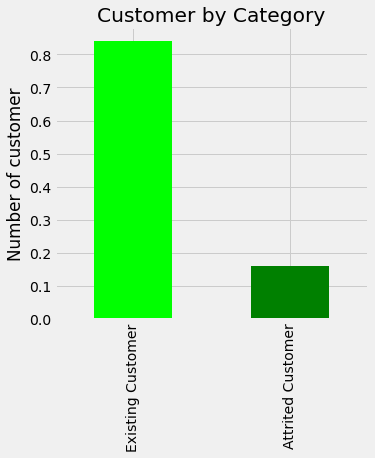

In [13]:
# ploting graph to have a look
colors = ['lime','green']
df.Attrition_Flag.value_counts(normalize=True).plot(kind='bar', figsize=(5,5),color=colors) 
plt.title('Customer by Category')
plt.ylabel('Number of customer')
plt.show()

### Study the customer status on categorical variable Gender and Marital Status

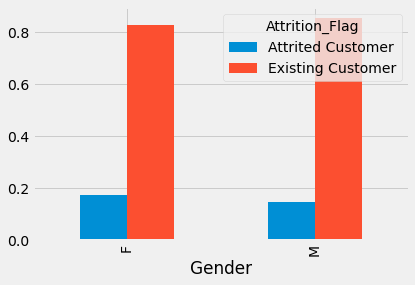

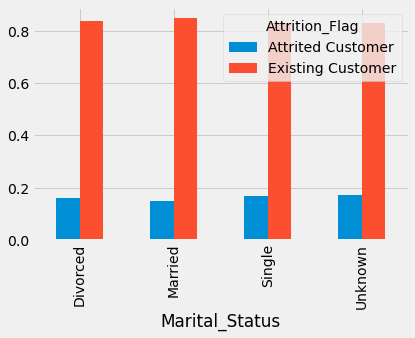

In [14]:
# Plot the categorical variable by chart
Categorial_variable = ['Gender','Marital_Status']

for i in Categorial_variable:
    df.groupby(i).Attrition_Flag.value_counts(normalize=True).unstack().plot(kind='bar') 


From the above, we cannot see the Customer Attribtion Problem differences with the variable Gender and Marital Status. We move on to study the ordinal variable and interval variable

In short, gender and Marital Status do not have strong relation wtih Customer Attribtion.

### Study the Ordinal variable and Interval variable to see the impact on customer attribution problem

In this step, we create a **correlation heat map** to identify which variable have more effects on whether customer leaving the bank services.
We will pick out all the numeric variable first and plot the correlation metrics:


In [15]:
# Pick out the Numeric variable from the dataframe

# get all column
column_info=pd.DataFrame(df.dtypes)
# filter out the types which is numeric
numeric_variable= list(column_info.index[column_info[0] != 'object'])
numeric_variable.remove('CLIENTNUM') # remove clientnum
numeric_variable

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Education_Level_n',
 'Income_category_n',
 'Card_Category_n',
 'Attrition_Flag_n']

In [16]:
# Check the correlations these among variables to find out which variable have higher correlations to Attrition_Flag_n

In [17]:
# Slice the data with numeric variable remainding
df_corr = df[numeric_variable]
df_corr

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_n,Income_category_n,Card_Category_n,Attrition_Flag_n
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1.0,3.0,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,3.0,0.0,1,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,3.0,2.0,1,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1.0,0.0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,3.0,1.0,1,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,NaN,1.0,1,1
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1.0,0.0,1,1
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,3.0,1.0,1,1


<AxesSubplot:>

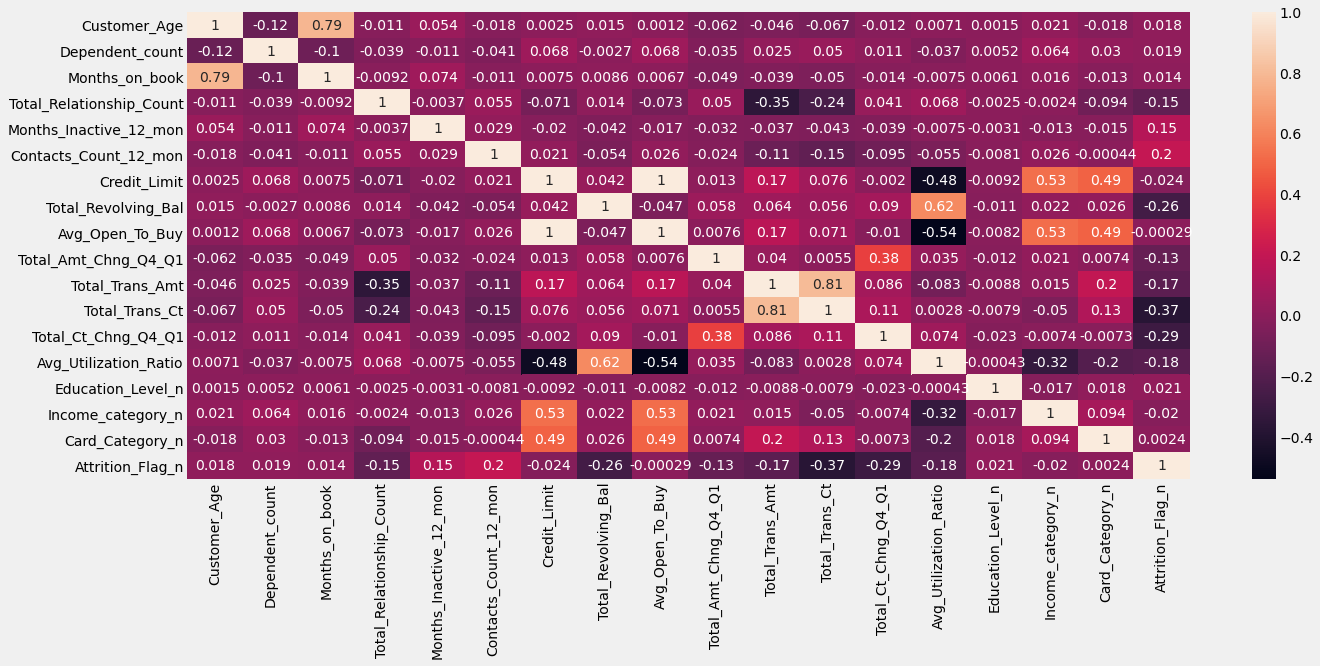

In [18]:
# get correlations and look at it
plt.figure(figsize=(20,8))
sns.heatmap(df_corr.corr(),annot=True)

From the heatmap, we didnt find any critical feature (high correlation) which have high effect on customer attrition problem [Attrition_Flag_n] .
But we can still select those with which have relative higher correlation among these variable to stuy about it.

Here, we will select:  
**1. Total_Trans_Ct [-0.37] - Total Transaction Count (Last 12 months)**     
**2.Total_Ct_Chng_Q4_Q1 [-0.29]  - Change in Transaction Count (Q4 over Q1)**    
**3.Total_Revolving_Bal [-0.26]  - Total Revolving Balance on the Credit Card**     
**4. Avg_Utilization_Ratio [-0.18] - Average Card Utilization Ratio**     

to plot the distribution.


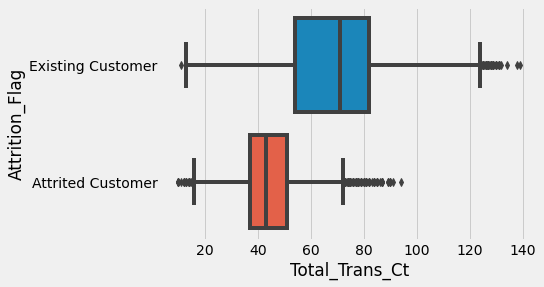

                    count       mean        std   min   25%   50%   75%    max
Attrition_Flag                                                                
Attrited Customer  1627.0  44.933620  14.568429  10.0  37.0  43.0  51.0   94.0
Existing Customer  8500.0  68.672588  22.919011  11.0  54.0  71.0  82.0  139.0


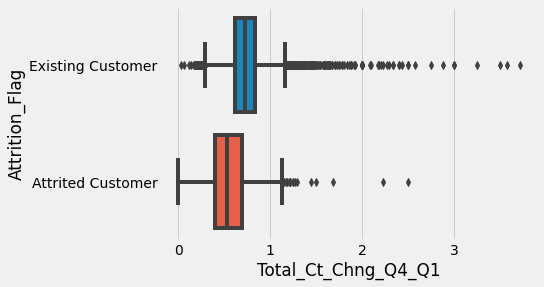

                    count      mean       std    min    25%    50%    75%  \
Attrition_Flag                                                              
Attrited Customer  1627.0  0.554386  0.226854  0.000  0.400  0.531  0.692   
Existing Customer  8500.0  0.742434  0.228054  0.028  0.617  0.721  0.833   

                     max  
Attrition_Flag            
Attrited Customer  2.500  
Existing Customer  3.714  


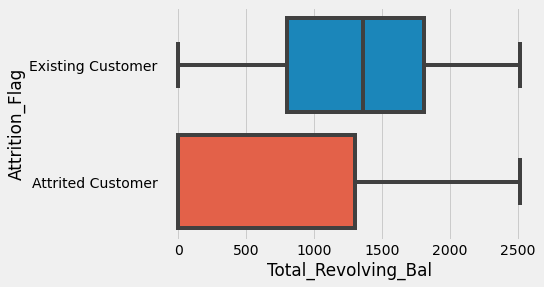

                    count         mean         std  min    25%     50%  \
Attrition_Flag                                                           
Attrited Customer  1627.0   672.822987  921.385582  0.0    0.0     0.0   
Existing Customer  8500.0  1256.604118  757.745354  0.0  800.0  1364.0   

                      75%     max  
Attrition_Flag                     
Attrited Customer  1303.5  2517.0  
Existing Customer  1807.0  2517.0  


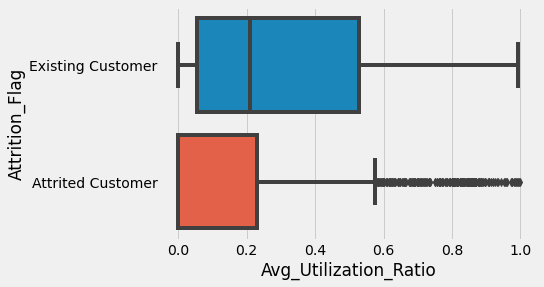

                    count      mean       std  min    25%    50%      75%  \
Attrition_Flag                                                              
Attrited Customer  1627.0  0.162475  0.264458  0.0  0.000  0.000  0.23100   
Existing Customer  8500.0  0.296412  0.272568  0.0  0.055  0.211  0.52925   

                     max  
Attrition_Flag            
Attrited Customer  0.999  
Existing Customer  0.994  


In [19]:
# Plot the distribuion with these numeric variable
selected_numeric_variable = ['Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal','Avg_Utilization_Ratio']

for i in selected_numeric_variable:
    ax = sns.boxplot(x=i, y='Attrition_Flag', data=df)
    plt.show()
    stat_table = df.groupby('Attrition_Flag')[i].describe()
    print(stat_table)

From the above **1st  boxplot on Total Transaction count in last 12 month [corr: - 0.37]** , we can see the most of the existing customers have around 54 - 82 transactions (median: 70) while attrited customers only have around 37 - 51 (median: 42) transactions in past 12 months. We suggest that the bank shall take actions to those existing customers which have transactions count dropped and fall out to range (54 - 82) continuously the might have a risk to leave the bank.

In the **2nd boxplot on Change in Transaction Count (Q4 over Q1) [corr: - 0.29]**, we find that most of the existing customer (0.6 - 0.83 , median : 0.72) sightly higher changes than those attrited customer(0.4-0.69 , median: 0.53)  by around 0.2. We suggest the bank should pay attention to those customers which have lower changing transaction counts then before (e.g dropped 0.2 , and lower than 0.6) and see if these customer have changed their habits or tends to churns the services.

For the **Total Revolving balance [corr: -0.26] and the Avg Utilization rate [corr: - 0.18]** both related to the credit amount usage on the credit card services, and this 2 variable are highly correlated (0.62).
we will look this 2 variable together.

From the **3rd boxplot**, we can see most of the existing customers have higher revolving balance (range: 800 - 1800 ) while most of the attrited customer is just 0 . And for the **utilization rate**, existing customers also have slightly higher rate than attrited customer ( most of the existing can have up to 0.2 - 0.5 utilization rate vs >50% attrited customer is just 0).

The bank might take this 2 factor together into consideration, if the existing customer have both utilization rate and revolving balance is 0 continuously , meaning the customer might not be actively using the credit cards. The bank shall look deeply to the customer profiles and identify any possibility the customer may leave the bank.

**Reference:**   
Revolving balance: In credit card terms, a revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle.
Utilization rate: The credit utilization ratio is the percentage of a borrower’s total available credit that is currently being utilized.

### Alternative: See whether the Attrition_Flag have relationships together with Income level and Education level together

Since the correlation heatmap just shows the indepedent relationships among Attrition_Flag, we would like to see if we look into Attrition Status with Income and education level together, will there be any difference:


In [20]:
# Try to build up a two way table
# Step1: select only needed fields and get the distribution in the table
income_education=pd.DataFrame(df.groupby(['Education_Level','Income_Category']).Attrition_Flag.value_counts(normalize=True))
income_education.rename(columns={"Attrition_Flag": "Attrition_Flag_distribution"},inplace=True)
# move the index into coulumns
income_education.reset_index(inplace=True)
income_education=income_education[income_education.Attrition_Flag=='Attrited Customer']
income_education


,Education_Level,Income_Category,Attrition_Flag,Attrition_Flag_distribution
1,College,$120K +,Attrited Customer,0.171429
3,College,$40K - $60K,Attrited Customer,0.131148
5,College,$60K - $80K,Attrited Customer,0.128788
7,College,$80K - $120K,Attrited Customer,0.205714
9,College,Less than $40K,Attrited Customer,0.142029
11,College,Unknown,Attrited Customer,0.148148
13,Doctorate,$120K +,Attrited Customer,0.216216
15,Doctorate,$40K - $60K,Attrited Customer,0.157143
17,Doctorate,$60K - $80K,Attrited Customer,0.118644
19,Doctorate,$80K - $120K,Attrited Customer,0.192982


In [21]:
# Plot 2 way pivot table
income_education.pivot(index='Education_Level', columns='Income_Category', values='Attrition_Flag_distribution')

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Education_Level,,,,,,
College,0.171429,0.131148,0.128788,0.205714,0.142029,0.148148
Doctorate,0.216216,0.157143,0.118644,0.192982,0.265823,0.228571
Graduate,0.156863,0.139241,0.123223,0.140167,0.184372,0.147590
High School,0.190476,0.143662,0.136808,0.133117,0.150522,0.191111
Post-Graduate,0.133333,0.153153,0.207792,0.209877,0.200000,0.085106
Uneducated,0.193277,0.164659,0.123077,0.170507,0.153257,0.172973
Unknown,0.158333,0.185874,0.147619,0.150685,0.172662,0.186207


Recall the overall Attrited customer percentage is 0.16, it seems most of income and education groups shows similar pattern which have aroround 0.13~0.19 attrited customer.

However, there is relatively more attrited customer for **education level is doctorate , and income level which is Less than $ 40K**. It have **10% more attrited customers** than the overall groups. The bank may also pay more attention to this group.

## Conclusion

From the above study, we have find that there is some factors will affect customer become attrited, including the transcation behaviour,**total transaction in count in past 12 month and change in transcation count over Q4 to Q1**. Second will be the credit amount behaviour,**the revoloving balance and the ulitization rate**. The bank may look at these factor where there is a drop of these value as a signals to leave the bank. The demographic variable Gender and the Marital Status seems dont have much impact on customer attrition problem.

In addition, we also find that customer who have **doctorate education level but have income lessthan $40k** will have sightly more attrited customer. The bank shall look deeply to these customers whether these customers is more senitivie than other groups to leave the bank.

However, there are limitation on this study. We didnt consider the **collinearity among variables**, so there might some factors  which have relations to Attrition Flag if we look the variables together. Also, we have just look into the linear relationship between the Attrition Flag and variables. Some factors which have **non-linear relationship** to the target variable might have miss out. 
We may consider to see use other method, such as logistic regression or decision tree to help us understand more (e.g. like have a look to p-value). 